In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

In [18]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [23]:
builder = tfds.builder("fashion_mnist")
info = builder.info
info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [20]:
df_train = tfds.load(name="fashion_mnist", split = "train")
df_test = tfds.load(name="fashion_mnist", split = "test")

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


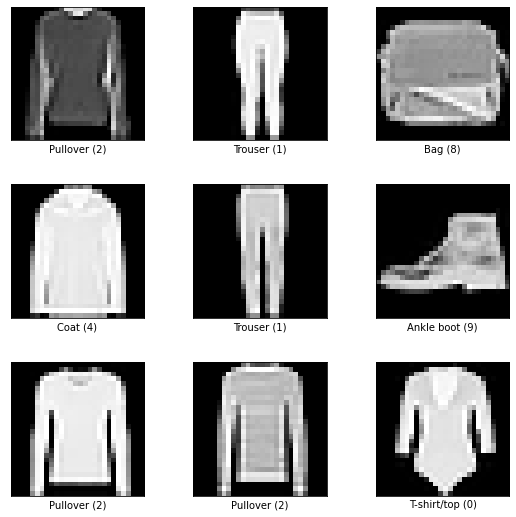

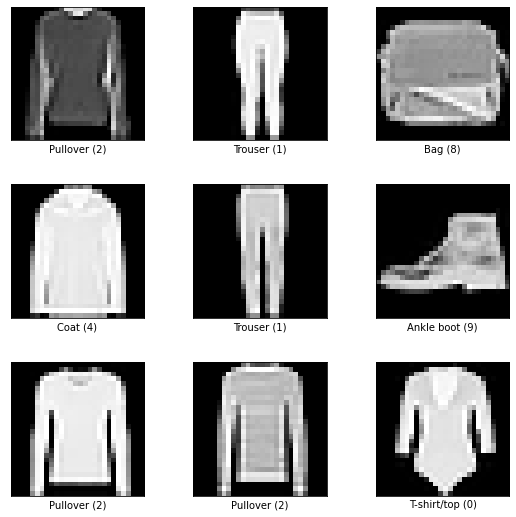

In [21]:
tfds.show_examples(info , df_train)

In [24]:
train_images = np.array([example['image'].numpy() for example in df_train])
train_labels = np.array([example['label'].numpy() for example in df_train])

test_images = np.array([example['image'].numpy() for example in df_test])
test_labels = np.array([example['label'].numpy() for example in df_test])

In [33]:
len(train_labels)

60000

# Model Building [ANN]

In [41]:
cnnModelBad = tf.keras.Sequential([
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(256, activation='relu'),
                                tf.keras.layers.Dense(512, activation='relu'),
                                tf.keras.layers.Dense(256, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

cnnModelBad.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)


In [42]:
cnnModelBad.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8637 - accuracy: 0.7758
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4579 - accuracy: 0.8352
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4190 - accuracy: 0.8499
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4023 - accuracy: 0.8566
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3826 - accuracy: 0.8641
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8679
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3565 - accuracy: 0.8726
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3451 - accuracy: 0.8772
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.8810
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.325

In [44]:
cnnModelBad.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8647


[0.4083215892314911, 0.8647000193595886]

In [71]:
cnnModel =tf.keras.Sequential([
                                tf.keras.layers.Conv2D(32, 2, activation = "relu", input_shape=(28,28,1)),
                                tf.keras.layers.Conv2D(32, 2, activation = "relu"),
                                tf.keras.layers.Dropout(0.5),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(128, activation='relu'),
                                tf.keras.layers.Dense(256, activation='relu'),
                                tf.keras.layers.Dense(512, activation='relu'),
                                tf.keras.layers.Dense(256, activation='relu'),
                                tf.keras.layers.Dense(10, activation='softmax')
])

cnnModel.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ["accuracy"]
)


In [72]:

cnnModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 32)        160       
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        4128      
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 21632)             0         
                                                                 
 dense_50 (Dense)            (None, 128)               2769024   
                                                                 
 dense_51 (Dense)            (None, 256)               33024     
                                                                 
 dense_52 (Dense)            (None, 512)             

In [73]:
cnnModel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5605 - accuracy: 0.8386
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3144 - accuracy: 0.8866
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2691 - accuracy: 0.9054
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2387 - accuracy: 0.9146
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2137 - accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1885 - accuracy: 0.9331
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1746 - accuracy: 0.9390
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1594 - accuracy: 0.9449
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1426 - accuracy: 0.9508
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.136

In [75]:
cnnModel.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.9103


[0.3297788202762604, 0.9103000164031982]